Load Libraries

In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Set Path

In [2]:
path_train="images/train"
path_val="images/validation"

In [3]:
params=[]

View Sentiments

In [4]:
for i in os.listdir(path_train):
    params.append(i)
    print(i,len(os.listdir(os.path.join(path_train,i))))

angry 3993
disgust 436
fear 4103
happy 7164
neutral 4982
sad 4938
surprise 3205


In [5]:
params

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

Figure Size View

In [6]:
fig=plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

Visualization of pictures

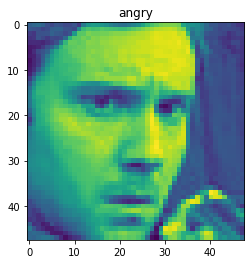

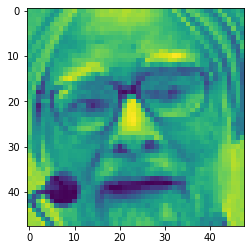

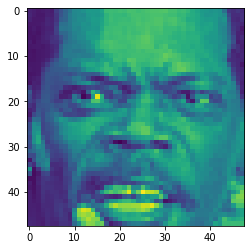

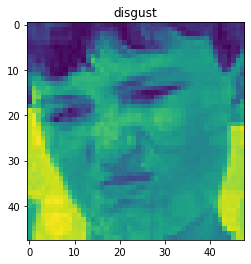

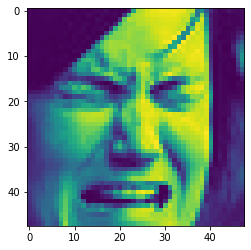

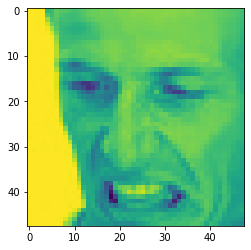

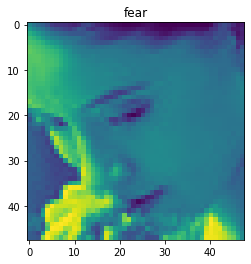

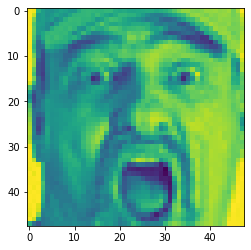

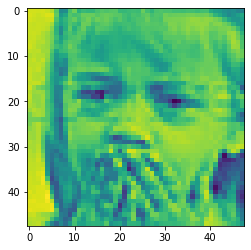

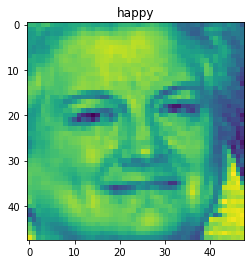

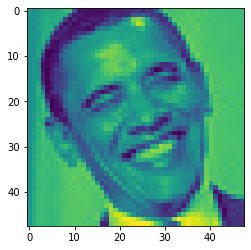

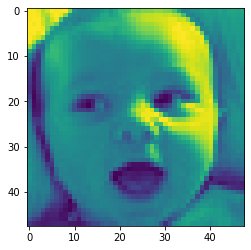

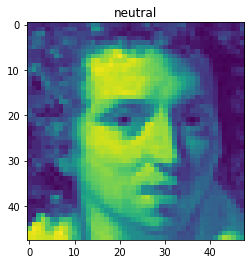

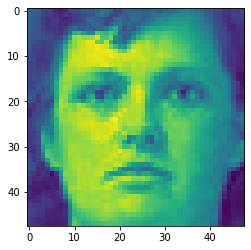

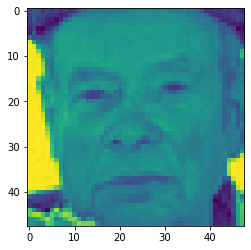

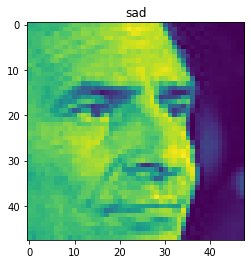

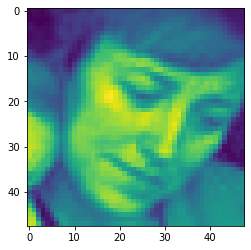

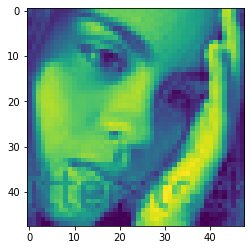

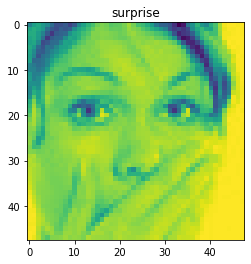

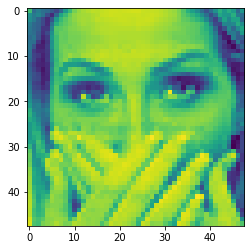

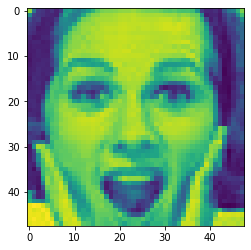

In [7]:

for m in params:
    k=0
    plt.title(m)
    pat=os.path.join(path_train,m)
    for img in os.listdir(pat):
        img_path=os.path.join(pat,img)
        if k<3:
            img_array=mpimg.imread(img_path)
            plt.imshow(img_array)
            plt.show()
            k=k+1
        else:
            break

In [8]:
training_data=[]

In [9]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

Loading Data

In [10]:
for m in params:
    pat=os.path.join(path_train,m)
    for img in os.listdir(pat):
        img_path=os.path.join(pat,img)
        photo=load_img(img_path,target_size=(256,256))
        photo = cv2.cvtColor(np.float32(photo), cv2.COLOR_RGB2GRAY)
        photo=img_to_array(photo)
        if m=='surprise':
            label=0
        elif m=='fear':
            label=1
        elif m=='angry':
            label=2
        elif m=='neutral':
            label=3
        elif m=='sad':
            label=4
        elif m=='disgust':
            label=5
        elif m=='happy':
            label=6
        training_data.append([photo,label])
        
        

In [11]:
len(training_data)

28821

Split Train and Test Data

In [12]:
import random

In [13]:
random.shuffle(training_data)

In [14]:
features=[]
labels=[]

In [15]:
for a,b in training_data:
    features.append(a)
    labels.append(b)

Train Data

In [16]:
x_train=features[0:20000]

In [17]:
y_train=labels[0:20000]

Test Data

In [18]:
x_val=features[20000:]

In [19]:
y_val=labels[20000:]

In [20]:
del params
del features
del labels

In [21]:
x_train=np.array(x_train)
x_val=np.array(x_val)
y_train=np.array(y_train)
y_val=np.array(y_val)

Scalling

In [22]:
x_train=x_train/255
x_val=x_val/255

In [23]:
x_train.shape

(20000, 256, 256, 1)

In [24]:
x_val.shape

(8821, 256, 256, 1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam,SGD

In [26]:
x_train.shape[1:]

(256, 256, 1)

In [27]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train, 7)

In [28]:
y_val=keras.utils.to_categorical(y_val,7)

In [30]:
Build CNN Model with Keras

SyntaxError: invalid syntax (<ipython-input-30-a99117c3e22c>, line 2)

In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(7, activation='softmax'))
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0

In [33]:
x_val.shape

(8821, 256, 256, 1)

In [34]:
y_val.shape

(8821, 7)

In [35]:
x_train.shape

(20000, 256, 256, 1)

In [36]:
y_train.shape

(20000, 7)

Fit Model

In [37]:
model.fit(x_train,y_train,
                    batch_size=64,
                    epochs=40,
                    verbose=2,
                    validation_data=(x_val,y_val))

Epoch 1/40
313/313 - 993s - loss: 1.7796 - accuracy: 0.3316 - val_loss: 1.5637 - val_accuracy: 0.4022
Epoch 2/40
313/313 - 1011s - loss: 1.4685 - accuracy: 0.4473 - val_loss: 1.5022 - val_accuracy: 0.4286
Epoch 3/40
313/313 - 1020s - loss: 1.3300 - accuracy: 0.5049 - val_loss: 1.4528 - val_accuracy: 0.4507
Epoch 4/40
313/313 - 996s - loss: 1.1993 - accuracy: 0.5619 - val_loss: 1.5014 - val_accuracy: 0.4479
Epoch 5/40
313/313 - 986s - loss: 1.0730 - accuracy: 0.6121 - val_loss: 1.4754 - val_accuracy: 0.4523
Epoch 6/40
313/313 - 988s - loss: 0.9505 - accuracy: 0.6615 - val_loss: 1.5142 - val_accuracy: 0.4615
Epoch 7/40
313/313 - 989s - loss: 0.8200 - accuracy: 0.7127 - val_loss: 1.5922 - val_accuracy: 0.4603
Epoch 8/40
313/313 - 990s - loss: 0.6852 - accuracy: 0.7684 - val_loss: 1.7496 - val_accuracy: 0.4433
Epoch 9/40
313/313 - 1001s - loss: 0.5613 - accuracy: 0.8141 - val_loss: 1.8624 - val_accuracy: 0.4587
Epoch 10/40
313/313 - 1004s - loss: 0.4409 - accuracy: 0.8590 - val_loss: 1.991

Save Model

In [39]:
model.save("faceexpressiondetector256.h5")